In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 14})
plt.rcParams.update({"axes.axisbelow": True})

In [4]:
coefficients_df = pd.read_csv(
    "../data/intermediate/preference_analysis/citation_style_effects_coefficients.csv"
)

In [71]:
coefficients_df.feature

0           response_word_count
1                 num_citations
2           response_word_count
3                 num_citations
4               proportion_news
5           response_word_count
6                 num_citations
7       proportion_left_leaning
8      proportion_right_leaning
9     proportion_center_leaning
10      proportion_high_quality
11       proportion_low_quality
12      proportion_left_leaning
13     proportion_right_leaning
14    proportion_center_leaning
15      proportion_high_quality
16       proportion_low_quality
Name: feature, dtype: object

In [75]:
feature_names = {
    "num_citations": "Citation count",
    "response_word_count": "Response word count",
    "proportion_news": "News proportion",
    "proportion_left_leaning": "News proportion - left",
    "proportion_right_leaning": "News proportion - right",
    "proportion_center_leaning": "News proportion - center",
    "proportion_high_quality": "News proportion - high-quality",
    "proportion_low_quality": "News proportion - low-quality",
}

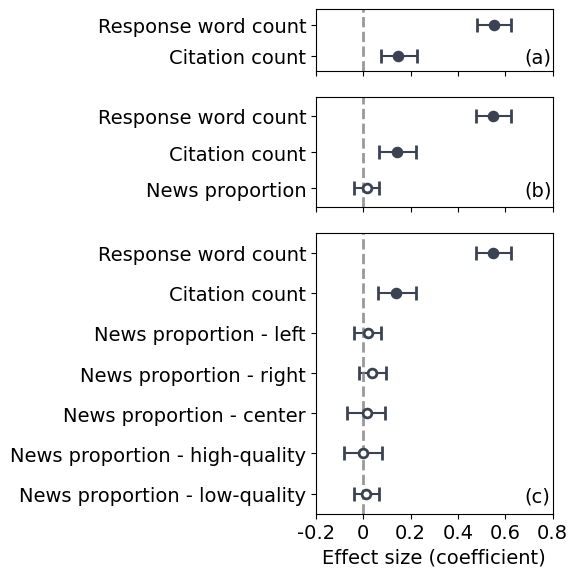

In [121]:
height_ratios = [2, 3.5, 9]
gs_kw = dict(height_ratios=height_ratios)
fig, axs = plt.subplots(nrows=3, ncols=1, gridspec_kw=gs_kw, figsize=(6, 6))
model_axs = zip(
    ["basic_response", "proportion_news", "bias_and_quality_all_citations"], axs
)

for model_index, (model_name, ax) in enumerate(model_axs):
    temp_df = coefficients_df.query(f"model_specification == '{model_name}'").iloc[::-1]
    y_pos = np.arange(len(temp_df))
    ax.errorbar(
        temp_df["coefficient"],
        y_pos,
        xerr=[
            temp_df["coefficient"] - temp_df["ci_lower"],
            temp_df["ci_upper"] - temp_df["coefficient"],
        ],
        fmt="o",
        capsize=5,
        capthick=2,
        color="black",
        ecolor="#3B4252",
    )
    for i, (coeff, sig) in enumerate(
        zip(temp_df["coefficient"], temp_df["significant"])
    ):
        color = "#3B4252" if sig else "white"
        ax.scatter(
            coeff, i, color=color, edgecolor="#3B4252", s=40, zorder=3, linewidths=2
        )
    n_variables = len(temp_df)
    margin = 0.5
    ax.set_ylim([-margin, len(temp_df) - 1 + margin])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(temp_df["feature"].apply(feature_names.get))

    ax.set_xlim([-0.2, 0.8])
    xs = [-0.2, 0, 0.2, 0.4, 0.6, 0.8]
    ax.set_xticks(xs)

    if model_index == 2:
        ax.set_xlabel("Effect size (coefficient)")
        ax.set_xticklabels(xs)
    else:
        ax.set_xticklabels([])
    ax.axvline(x=0, color="gray", linestyle="--", alpha=0.8, linewidth=2)
    ax.text(0.68, -0.2, f"({'abc'[model_index]})")
plt.tight_layout()
plt.savefig("../data/output/preference_analysis/user_preference_coefficients.pdf")